# Домашнее задание №1

## Подключение библиотек

In [1]:
import cv2
import numpy as np
import pathlib
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Поиск лица на изображении

Загрузка исходного изображения

In [2]:
basePath = pathlib.Path().resolve()
image = cv2.imread(pathlib.Path().joinpath(basePath, 'lenna.png').as_posix())

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

face = faces[0]

## 2. Отступ на 10% от границ лица

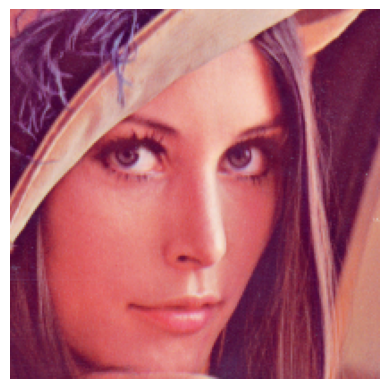

In [4]:
x, y, w, h = face

padding = int(0.1 * min(w, h))
face_roi = image[y - padding:y + h + padding, x - padding:x + w + padding]

plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 3. Получение границ объектов на изображении

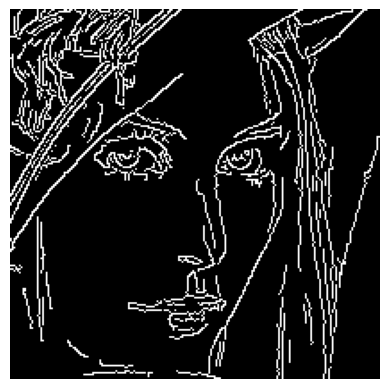

In [5]:
canny_edges = cv2.Canny(face_roi, 100, 200)

plt.imshow(cv2.cvtColor(canny_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 4. Угловые точки

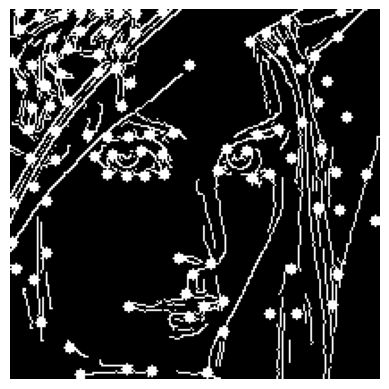

In [6]:
gray_face_roi = cv2.cvtColor(face_roi, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray_face_roi, 100, 0.01, 10)
corners = np.intp(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(canny_edges, (x, y), 3, 255, -1)

plt.imshow(cv2.cvtColor(canny_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 5. Морфологическая операция наращивания

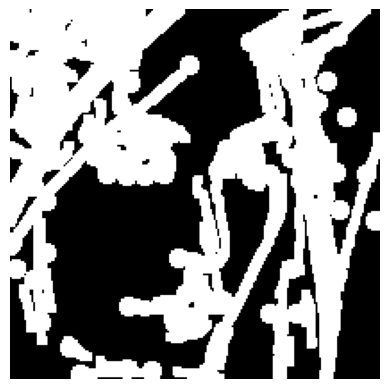

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_edges = cv2.dilate(canny_edges, kernel, iterations=1)

plt.imshow(cv2.cvtColor(dilated_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 6. Сглаживание краев гауссовским фильтром 5 на 5

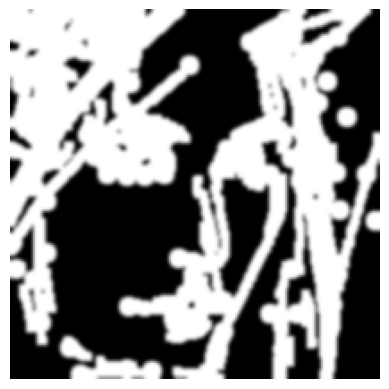

In [8]:
smoothed_edges = cv2.GaussianBlur(dilated_edges, (5, 5), 0)

plt.imshow(cv2.cvtColor(smoothed_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 7. Нормализованное изображение M

In [9]:
normalized_image = smoothed_edges / 255.0

## 8. Сглаживание гауссовским фильтром 7 на 7

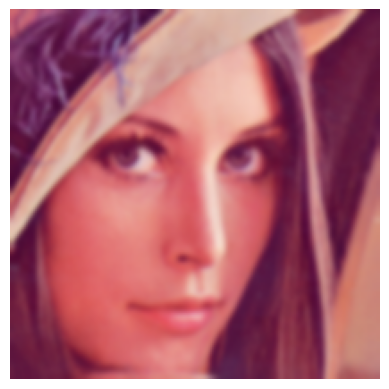

In [10]:
smoothed_image = cv2.GaussianBlur(face_roi, (7, 7), 0)

plt.imshow(cv2.cvtColor(smoothed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 9. Перевод в пространство HSV и увеличение насыщенности

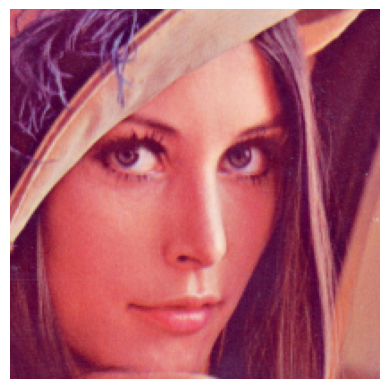

In [11]:
hsv_image = cv2.cvtColor(face_roi, cv2.COLOR_BGR2HSV)
hsv_image = hsv_image.astype(float)

hsv_image[:, :, 1] *= 1.05

hsv_image = hsv_image.astype(np.uint8)
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 10. Улучшение четкости

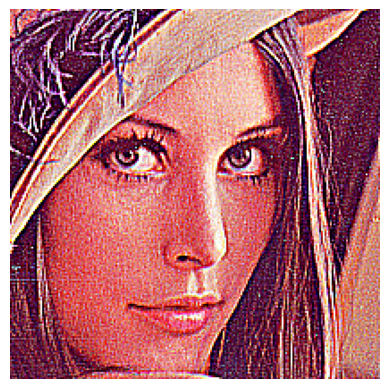

In [12]:
sharpened_image = cv2.filter2D(hsv_image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))

plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 11. Финальная фильтрация

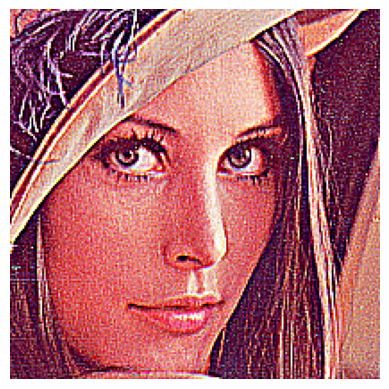

In [13]:
result_image = np.zeros_like(sharpened_image)
for i in range(3):
    result_image[:, :, i] = normalized_image * sharpened_image[:, :, i] + (1 - normalized_image) * sharpened_image[:, :, i]
    
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()